#  Indian Startup Funding Analysis (2015– 2021)

#  WHY are we doing this project?
# Before diving into code or charts, we must know the purpose. :

#  Objective of the Project:
# "The goal of this project is to analyze trends in Indian startup funding from 2015  to 2021.
# We aim to understand how much funding startups raise, which industries attract the most capital, top investors, and
# the growth of Indian startup ecosystems over the years.
# This insight can help us understand the startup boom, investment behaviors, and emerging sectors in India."

# In this project, I am analyzing the Indian Startup Funding landscape using real-world data. The goal is to uncover insights such as:

# $Year-wise funding trends

# Top funded startups

# Most active investors

# City-wise and sector-wise funding distribution

# Funding stages and investor behavior and many more;

# This project helps sharpen my data analysis, visualization, and business storytelling skills — making it a great addition to my Data Science portfolio.

# first we can do year wise funding analysis

# step1 importing dataset and liberies

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:\\Users\\VARUN\\OneDrive\\Attachments\\Desktop\\startup_fund\\indian_startup_funding.csv")
df
df.head(10)
       

,Date,Startup Name,Industry,Sub-vertical,Location,Investors,Investment Type,Amount in USD,Website URL
0,14-04-2021,Swiggy,Online Food Delivery,Online Food Delivery,Bengaluru,"Amansa Holdings, Carmignac, Falcon Edge Capita...",Series J,343000000.0,https://www.swiggy.com/
1,14-04-2021,Beldara,E-commerce,Global B2B marketplace,Mumbai,Hindustan Media Ventures,Venture,7400000.0,https://beldara.com/
2,07-04-2021,Groww,FinTech,Investment platform,Bengaluru,"MC Global Edtech, B Capital, Baron, others",Series D,83000000.0,https://groww.in/
3,05-04-2021,Meesho,E-commerce,Online reselling platform,Bengaluru,SoftBank Vision Fund 2,Series E,300000000.0,http://www.meesho.com/
4,01-04-2021,BYJU’S,Edu-tech,Online tutoring,Bengaluru,Innoven Capital,Series F,460000000.0,http://www.byjus.com/
5,31-03-2021,Uniphore,Technology,Conversational Service Automation (CSA),Palo Alto,Sorenson Capital Partners,Series D,140000000.0,http://uniphore.com/
6,30-03-2021,BYJU’S,Edu-tech,Online tutoring,Bengaluru,"MC Global Edtech, B Capital, Baron, others",Series F,460000000.0,http://www.byjus.com/
7,30-03-2021,Dunzo,E-commerce,Hyper-local delivery app,Bengaluru,Krishtal Advisors Pte Ltd,Series E,8000000.0,http://dunzo.in/
8,26-03-2021,DotPe,FinTech,Commerce and payments platform to offline ente...,Gurgaon,PayU,Series A,27500000.0,https://dotpe.in/
9,25-03-2021,CityMall,E-commerce,Social ecommerce and online grocery platform,Gurgaon,Accel Partners,Series A,11000000.0,https://www.citymall.live/


# step2 : Data cleaning


In [10]:
df.columns

Index(['Date', 'Startup Name', 'Industry', 'Sub-vertical', 'Location',
       'Investors', 'Investment Type', 'Amount in USD', 'Website URL'],
      dtype='object')

In [11]:
# Clean column names  
df.columns = df.columns.str.strip() # used to remove any extra spaces before or after the column names in the dataset.


In [12]:
# Drop nulls and duplicates
df.dropna(subset=['Date', 'Amount in USD'], inplace=True)
df.drop_duplicates(inplace=True)

In [13]:
# Convert Date to datetime and extract year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
# First, ensure the 'Amount in USD' column is numeric (in case it's stored as strings)
df['Amount in USD'] = pd.to_numeric(df['Amount in USD'], errors='coerce')


# Convert the 'Amount in USD' to billions for better readability
df['Amount in USD (Billion)'] = df['Amount in USD'] / 1e9


C:\Users\VARUN\AppData\Local\Temp\ipykernel_18908\1708898645.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [14]:
# In the dataset, we observed duplicate entries due to name variations.
# We are merging these similar startup names for accurate analysis:

# - 'Flipkart' and 'Flipkart.com' → 'Flipkart'
# - 'BYJU’S' and 'Byju’s' → 'BYJU'S'
# - 'Ola', 'Ola Cabs', and 'Olacabs' → 'Ola'
# - 'Paytm' and 'PayTm' → 'Paytm'

# Fixing Startup Name
startup_mapping = {
    'Flipkart.com': 'Flipkart',
    'olacabs': 'ola',
    'ola cabs': 'ola',
    'byju’s': 'byjus',
    'byju’s': 'byjus',
    
}

df['Startup Name'] = df['Startup Name'].replace(startup_mapping)


# Clean and standardize industry names

# also we found that  We found several variations of the same industry label in the dataset.
# To avoid misrepresentation and ensure accurate analysis, we’re merging them:

# - 'eCommerce', 'E-commerce', 'ECommerce', and 'E-Commerce' → 'eCommerce'
# - 'Edu-tech' → 'EdTech'
# - 'FinTech' and 'Financ



df['Industry'] = df['Industry'].str.strip().str.lower()  # Remove spaces + lowercase
df['Industry'] = df['Industry'].replace({
    'e-commerce': 'ecommerce',
    'ecommerce': 'ecommerce',
    'e-commerce': 'ecommerce',
    'edu-tech': 'edtech',
    'edutech': 'edtech',
    'finance': 'fintech',
    'fin-tech': 'fintech'
})
df['Industry'] = df['Industry'].str.title()






# also we found several variations of  city names 
# so we are  standardizing  industry name
df['Location'] = df['Location'].replace({
     'Bangalore'  :'Bengaluru' ,
     'Gurgaon':'Gurugram',
    'New Delhi': 'Delhi'
})


# as we are doing only indain satrup analysis  
#  we are removing List of non-Indian or unwanted foreign locations
foreign_cities = ['California', 'New York', 'Menlo Park', 'San Francisco', 
                  'United States', 'London', 'Singapore', 'Dubai', 'Palo Alto', 'Delaware', 'Berlin']

# Filter only Indian locations 
df = df[~df['Location'].isin(foreign_cities)]


# step3 :  Group by year and sum the funding


In [16]:
yearly_funding = df.groupby('Year')['Amount in USD (Billion)'].sum().reset_index()

In [17]:
yearly_funding

,Year,Amount in USD (Billion)
0,2015,8.724242
1,2016,3.900159
2,2017,10.429310
3,2018,4.822368
4,2019,8.933419
5,2020,4.020309
6,2021,2.877093


# step 4 : Plotting graph

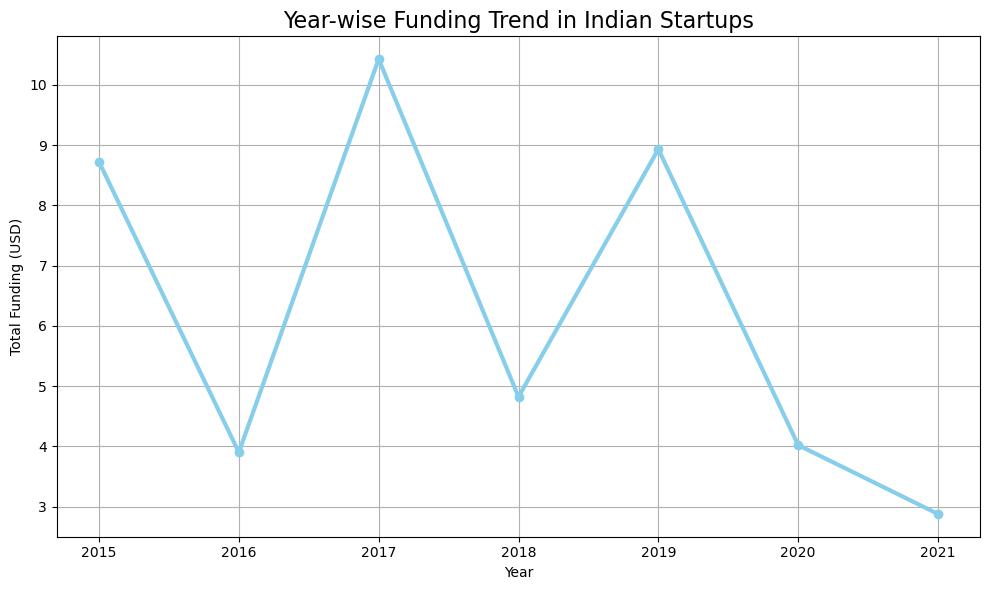

In [19]:


plt.figure(figsize=(10,6))
plt.plot(yearly_funding['Year'], yearly_funding['Amount in USD (Billion)'], marker='o', color='skyblue', linewidth=3)
plt.title('Year-wise Funding Trend in Indian Startups', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Total Funding (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

# In conclusion, Indian startup funding saw a significant boom in 2017, reaching a peak of 10 billion dollars.
# The funding was also notably high in 2015, with 8 billion dollars, and in 2019, with 9 billion dollars.
# However, the least funding was observed in 2021, with only 3 billion dollars."

# next we can do anlysis on top funded startups 

# first we can do top Funded Startups per Year

# step1:  Grouping by 'Year' and 'Startup Name' and summing the funding

In [25]:
top_startups_per_year = df.groupby(['Year', 'Startup Name'])['Amount in USD (Billion)'].sum().reset_index()



# step2   : Sorting to get top 5 funded startups each year


In [27]:
top_startups_per_year_sorted = top_startups_per_year.sort_values(by=['Year', 'Amount in USD (Billion)'], ascending=[True, False])

# step 3: Getting top 5 funded startups per year 


In [29]:
top_5_per_year = top_startups_per_year_sorted.groupby('Year').head(5)
top_5_per_year

,Year,Startup Name,Amount in USD (Billion)
169,2015,Flipkart,0.7500
369,2015,Paytm,0.6800
351,2015,Ola,0.5000
456,2015,Snapdeal,0.5000
353,2015,Olacabs,0.4000
1052,2016,Snapdeal,0.2000
891,2016,MakeMyTrip,0.1800
814,2016,Hike,0.1750
665,2016,BigBasket,0.1500
686,2016,CarTrade,0.1450


# step 4 : Plot the top 5 funded startups per year with different colors for each year

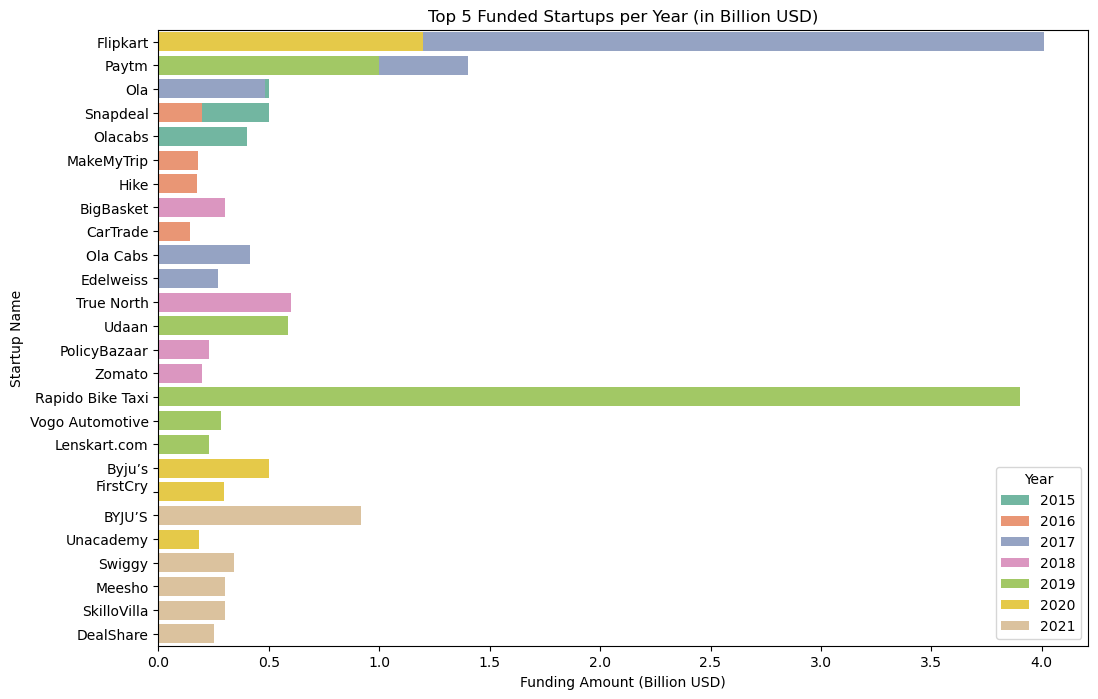

In [31]:

plt.figure(figsize=(12, 8))
sns.barplot(data=top_5_per_year, x='Amount in USD (Billion)', y='Startup Name', hue='Year', dodge=False, palette="Set2")
plt.title("Top 5 Funded Startups per Year (in Billion USD)")
plt.xlabel("Funding Amount (Billion USD)")
plt.ylabel("Startup Name")
plt.show()


# From the analysis and the visualizations, here's a possible conclusion based on the top-funded startups per year:

# Conclusion:
# 2015:

# The year 2015 saw major investments in well-established startups like Flipkart and Paytm. These startups had relatively 
# high funding amounts in comparison to others.

# Flipkart and Paytm, both giants in the e-commerce and digital payment space, attracted significant investor interest.

# 2016:

# Snapdeal, MakeMyTrip, and Hike were some of the top-funded startups in 2016. While Snapdeal received considerable funding, 
# it was not able to maintain its momentum compared to other startups.

# The funding landscape in 2016 indicates that e-commerce and travel startups were still the key players, with Snapdeal and MakeMyTrip taking a large share.



# 2017:

 # Flipkart received an enormous amount of funding, dominating the funding landscape in 2017 with approximately $4 billion, 
# significantly outpacing other startups.

# Paytm also saw major funding in 2017, which aligns with the growth of fintech companies in India.

# Overall, 2017 was a year of explosive growth for certain startups, particularly Flipkart and Paytm, 
# reflecting their increasing dominance in the Indian market.

# 2018:

# In 2018, companies like True North, Automation Anywhere, and BigBasket received significant investments, 
# highlighting the interest in tech and e-commerce.

# The funding figures for 2018 suggest that the investment focus was shifting toward newer sectors like automation and logistics, 
# alongside traditional players like BigBasket.



# 2019:

# Rapido Bike Taxi received the largest funding in 2019, with other major players like Paytm and Udaan also attracting substantial investments.

# The rise of Rapido highlights the increasing demand for mobility services and suggests a shift towards newer industries, such as ride-sharing,
# gaining more investor attention.

# 2020:

# Flipkart continued to dominate, securing significant investments once again in 2020. Byju’s also saw increased investments, 
# reflecting the growing importance of EdTech during the pandemic.

# The year 2020 shows how sectors like e-commerce and online education gained considerable investor support as the pandemic reshaped business models.

# 2021:

# BYJU’S dominated once again in 2021, with Swiggy, Meesho, and others securing significant funding.

# The trend of EdTech dominance, led by BYJU’S, continues into 2021, with Meesho and Swiggy also seeing 
# substantial investments due to the growing demand for e-commerce and food delivery services.



# Overall Trends:
# E-commerce and EdTech have been the dominant sectors over the years, with companies like Flipkart, Paytm, and BYJU’S consistently receiving massive funding.

# Fintech and Food Delivery (like Swiggy) also became prominent as new-age businesses took off, especially post-2017.

# The most significant funding year was 2017, with Flipkart raising around $4 billion, showing the maturity of the Indian startup ecosystem by that time.

# 2021 showed that sectors like EdTech (BYJU’S), Food Delivery (Swiggy), and E-commerce (Meesho) were still receiving major investments.

 #   next we can do analysis top funded startups overall years

# Step 1: Group the data by Startup Name and sum the funding across all years


In [39]:
overall_funding = df.groupby('Startup Name')['Amount in USD (Billion)'].sum().reset_index()

# Step 2: Sort the data in descending order based on funding


In [41]:
top_overall_funded = overall_funding.sort_values(by='Amount in USD (Billion)', ascending=False).head(10)
top_overall_funded

,Startup Name,Amount in USD (Billion)
523,Flipkart,5.95970
1214,Rapido Bike Taxi,3.90000
1109,Paytm,3.14895
127,BYJU’S,1.12000
1060,Ola,0.98450
1542,Udaan,0.87000
1370,Snapdeal,0.70000
1707,Zomato,0.68500
1061,Ola Cabs,0.66970
210,Byju’s,0.66000


# Step 3: Plot the Top 10 Funded Startups Overall


C:\Users\VARUN\AppData\Local\Temp\ipykernel_18908\1415529543.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_overall_funded, x='Amount in USD (Billion)', y='Startup Name', palette='viridis')


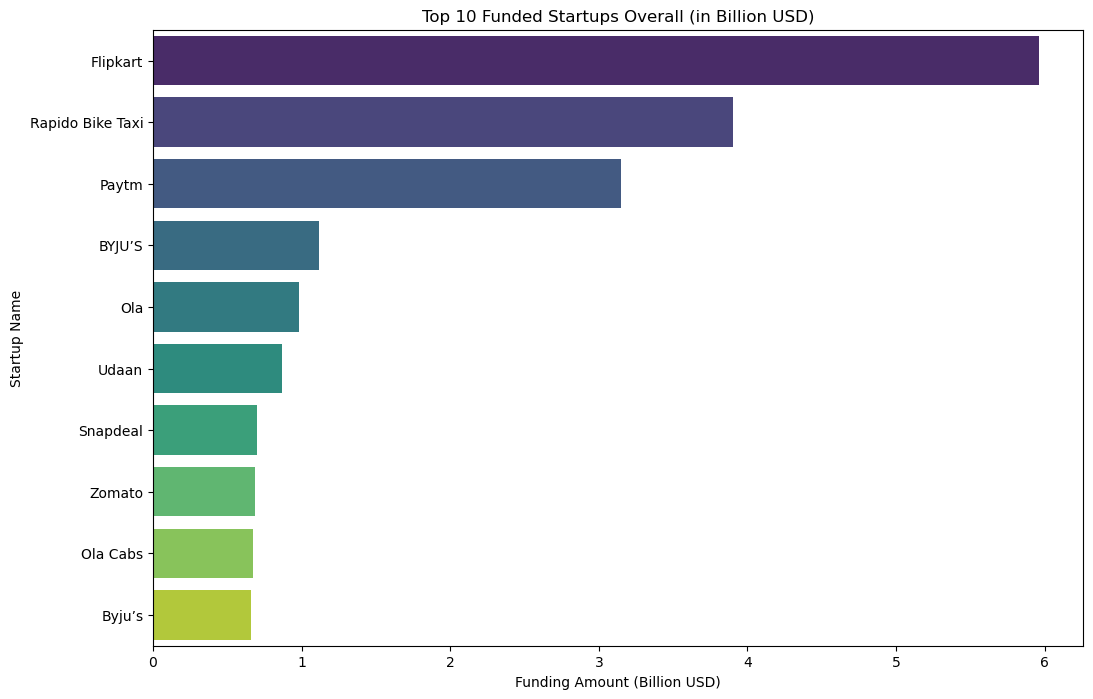

In [43]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_overall_funded, x='Amount in USD (Billion)', y='Startup Name', palette='viridis')
plt.title("Top 10 Funded Startups Overall (in Billion USD)")
plt.xlabel("Funding Amount (Billion USD)")
plt.ylabel("Startup Name")
plt.show()

 # Conclusion from the Analysis of Top Funded Startups Overall:
# Based on the funding data, we can draw the following conclusions:

# Flipkart stands as the top funded startup, receiving a total of $5.26 billion, which highlights its dominance in the Indian e-commerce market.

# Rapido Bike Taxi has secured the second-highest funding, with $3.90 billion, showcasing the growing interest and investment in
# the ride-hailing and micro-mobility sector in India.

# Paytm comes third with $3.15 billion, reflecting its significant role in the fintech and digital payment space in India.

# BYJU’S, with $1.12 billion in funding, highlights the strong investment in the edtech sector, 
# indicating the importance of online learning platforms in India.



# Ola, Udaan, and Snapdeal also show substantial investments, making them key players in their respective industries 
# (ride-hailing, e-commerce, and online marketplaces).

# Zomato has secured $0.69 billion, demonstrating the continued growth in the food delivery and restaurant tech sector,
# further cementing the popularity of foodtech in India.

# Overall Takeaway:
# The e-commerce and ride-hailing sectors, led by companies like Flipkart and Rapido, have attracted the highest funding in India.

# The fintech and edtech sectors are also drawing significant investment, with companies like Paytm and BYJU’S receiving substantial funding.

# Foodtech and online marketplaces like Zomato and Snapdeal continue to grow as important players in the Indian startup ecosystem.

# next we can do anlysis on  Industry-wise Funding 

#  step 1:Group by Industry and sum the funding

In [48]:

industry_funding = df.groupby('Industry')['Amount in USD (Billion)'].sum().reset_index()
industry_funding 

,Industry,Amount in USD (Billion)
0,Accounting,0.005000
1,Advertising,0.018000
2,"Advertising, Marketing",0.006000
3,Aerospace,0.050000
4,Agriculture,0.003239
...,...,...
113,Video,0.002000
114,Video Customer Experience(Cx) Platform,0.004500
115,Video Games,0.001300
116,Waste Management Service,0.026869


# step 2: Sort industries by the total funding in descending order


In [50]:

industry_funding = industry_funding.sort_values(by='Amount in USD (Billion)', ascending=False)
industry_funding 


,Industry,Amount in USD (Billion)
36,Ecommerce,10.730710
23,Consumer Internet,6.321741
110,Transportation,3.925282
47,Fintech,3.629379
107,Technology,2.266541
...,...,...
91,Ott Player,0.000200
71,Inspiration,0.000200
20,Compliance,0.000145
89,Online Marketplace,0.000143


# step 3: Get top 10 industries by funding

In [52]:

industry_funding_top10 = industry_funding.head(10)
industry_funding_top10

,Industry,Amount in USD (Billion)
36,Ecommerce,10.730710
23,Consumer Internet,6.321741
110,Transportation,3.925282
47,Fintech,3.629379
107,Technology,2.266541
38,Edtech,2.249397
12,B2B,0.587000
66,Hospitality,0.508747
64,Healthcare,0.418218
87,Online Food Delivery,0.386000



# step 4: ploting graph

C:\Users\VARUN\AppData\Local\Temp\ipykernel_18908\24289970.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=industry_funding_top10, x='Amount in USD (Billion)', y='Industry', palette='viridis')


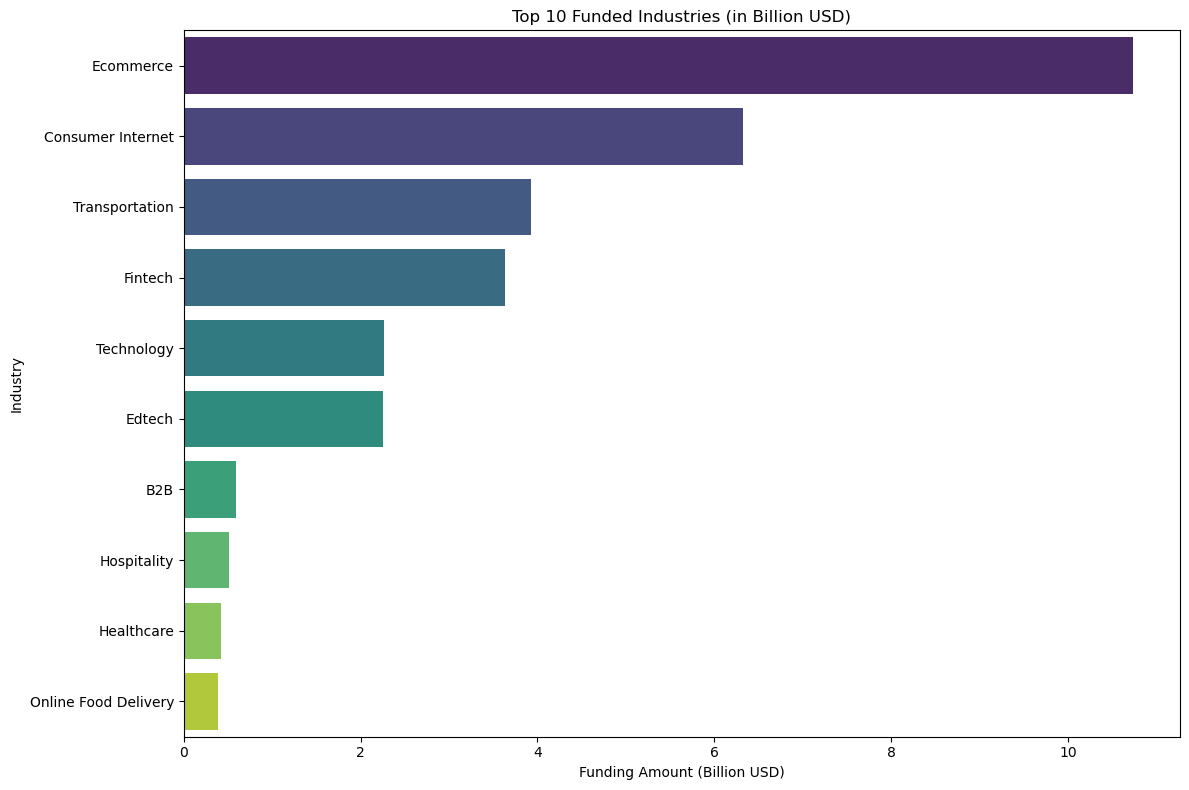

In [54]:

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=industry_funding_top10, x='Amount in USD (Billion)', y='Industry', palette='viridis')

plt.title("Top 10 Funded Industries (in Billion USD)")
plt.xlabel("Funding Amount (Billion USD)")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()



# Conclusions:
# Ecommerce leads the game
# Ecommerce received the highest total funding of around $10.79 Billion, clearly dominating other industries —
# showing strong investor confidence and rapid growth in online retail and marketplaces.

# Consumer Internet is booming
# With over $6.32 Billion in funding, Consumer Internet is the second-most funded space — 
# covering platforms and services that cater directly to consumers.



# Transport and Fintech are major players
# Transportation startups attracted 3.92 Billion dollars, likely driven by mobility apps and logistics tech.
# Fintech also saw significant investment ($3.68 Billion), indicating continued trust in digital payment and finance solutions.

# EdTech and Tech are still hot
# Edtech received over 2.24 Billion dollars, showing strong interest in online learning and education platforms, especially post-pandemic.
# Technology in general also secured $2.42 Billion, reflecting the wide appeal of core tech innovations.

# Healthcare and Wellness emerging slowly
# Health & Wellness, Healthcare, and B2B sectors saw relatively lower funding — under $0.6 Billion each 
# but their presence in the top 10 hints at growing attention.



# next we can do anlysiss on Year-wise Industry Funding Trends




# Step 1: Calculate total funding for each industry across all years



In [59]:
industry_total_funding = df.groupby('Industry')['Amount in USD (Billion)'].sum().reset_index()



# Step 2: Sort industries by total funding in descending order and select top 10


In [61]:
top_10_industries = industry_total_funding.sort_values(by='Amount in USD (Billion)', ascending=False).head(10)

In [62]:

# Step 3: Filter the original dataframe to include only the top 10 industries



In [63]:
top_10_df = df[df['Industry'].isin(top_10_industries['Industry'])]

In [64]:
#  step 4: Filter the main dataset to include only top industries


In [65]:
year_industry_funding = top_10_df.groupby(['Year', 'Industry']).agg({'Amount in USD (Billion)': 'sum'}).reset_index()


In [66]:

# Step 5: Pivot the table to get years as rows and industries as columns


In [67]:
pivoted_df = year_industry_funding.pivot(index='Year', columns='Industry', values='Amount in USD (Billion)')


In [68]:

# Step 6: Plot the year-wise funding trends for the top 10 industries

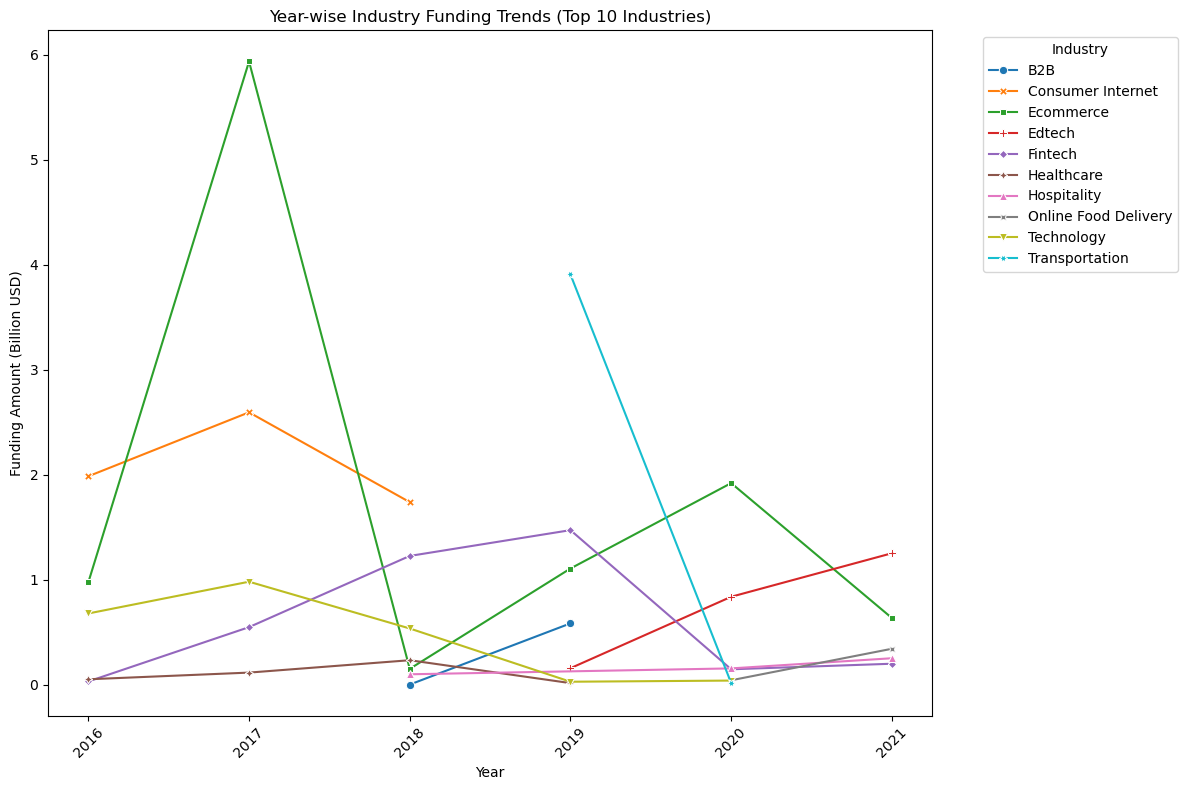

In [69]:




plt.figure(figsize=(12, 8))
sns.lineplot(data=pivoted_df, dashes=False, markers=True)

plt.title("Year-wise Industry Funding Trends (Top 10 Industries)")
plt.xlabel("Year")
plt.ylabel("Funding Amount (Billion USD)")
plt.xticks(rotation=45)
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#  step 7: we  are converting this graph to logarithmic scale for Y-axis to handle the wide range of funding values across industries.

# Using logarithmic scale for Y-axis to handle the wide range of funding values across industries.
# This helps in better visualizing smaller values alongside very large ones, making trends clearer
# for all top 10 industries, especially when there's a big gap between high and low funding amounts.


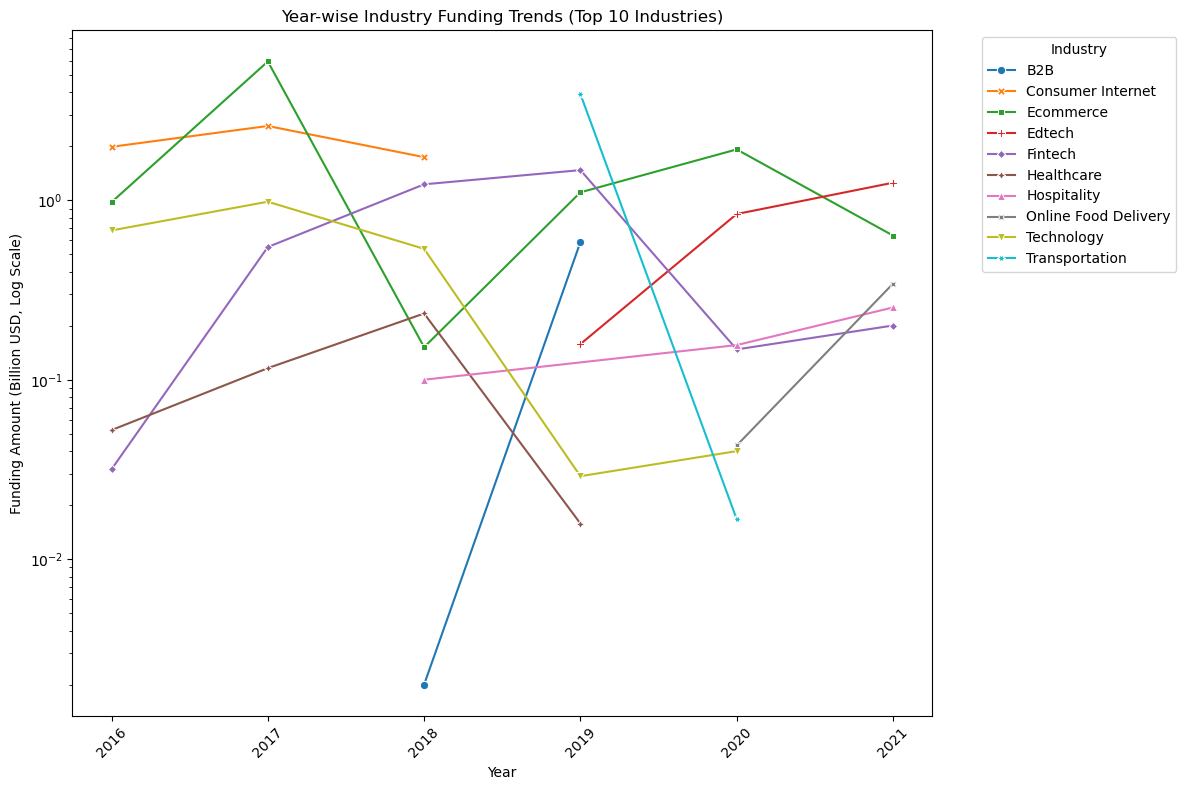

In [72]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=pivoted_df, dashes=False, markers=True)

plt.yscale("log")  # This is the key change
plt.title("Year-wise Industry Funding Trends (Top 10 Industries)")
plt.xlabel("Year")
plt.ylabel("Funding Amount (Billion USD, Log Scale)")
plt.xticks(rotation=45)
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#  Conclusion:
# The line plot clearly highlights the funding distribution trends across the top 10 industries over the years.
# By using a logarithmic scale on the y-axis, we effectively visualized the wide range of funding values,
# making it easier to compare industries with both high and low funding levels.

# Notable insights include:

# Ecommerce and Consumer Internet industries have consistently received higher funding, although Ecommerce shows fluctuations.

# Fintech and Edtech have shown a steady increase in funding over time, indicating growing investor interest.

# Some industries like Transportation and Health & Wellness show sharp spikes or drops, possibly due to specific events or market shifts.

# The log scale helped expose funding patterns in smaller industries like Healthcare and Hospitality, which might be hidden on a linear scale.

# Overall, the visualization reveals both the dominance and volatility of different industries in the funding landscape.



# next we can do top investor analysis

In [75]:
df.head()

,Date,Startup Name,Industry,Sub-vertical,Location,Investors,Investment Type,Amount in USD,Website URL,Year,Amount in USD (Billion)
0,2021-04-14,Swiggy,Online Food Delivery,Online Food Delivery,Bengaluru,"Amansa Holdings, Carmignac, Falcon Edge Capita...",Series J,343000000.0,https://www.swiggy.com/,2021,0.3430
1,2021-04-14,Beldara,Ecommerce,Global B2B marketplace,Mumbai,Hindustan Media Ventures,Venture,7400000.0,https://beldara.com/,2021,0.0074
2,2021-04-07,Groww,Fintech,Investment platform,Bengaluru,"MC Global Edtech, B Capital, Baron, others",Series D,83000000.0,https://groww.in/,2021,0.0830
3,2021-04-05,Meesho,Ecommerce,Online reselling platform,Bengaluru,SoftBank Vision Fund 2,Series E,300000000.0,http://www.meesho.com/,2021,0.3000
4,2021-04-01,BYJU’S,Edtech,Online tutoring,Bengaluru,Innoven Capital,Series F,460000000.0,http://www.byjus.com/,2021,0.4600


#  first we are trying to get  Most Active Investors (by Number of Deals)


# step 1 :  Drop rows with missing investors or amounts


In [78]:
df = df.dropna(subset=['Investors', 'Amount in USD'])

# step 2 : Split multiple investors and flatten the list

In [80]:
investor_list = df['Investors'].dropna().str.split(',').explode().str.strip()

# step 3 :  Count frequency



In [82]:
from collections import Counter
investor_freq = investor_list.value_counts().reset_index()
investor_freq.columns = ['Investor', 'Number of Deals']



# step 4 : Top 10 most active investors

In [84]:

top_active_investors = investor_freq.head(10)
print("Top 10 Most Active Investors:")
print(top_active_investors)

Top 10 Most Active Investors:
                 Investor  Number of Deals
0         Sequoia Capital               73
1          Accel Partners               62
2           SAIF Partners               52
3         Kalaari Capital               46
4                                       36
5          Blume Ventures               35
6            Tiger Global               31
7   Undisclosed Investors               29
8  Nexus Venture Partners               28
9            IDG Ventures               25


# step 5: plotting graph

C:\Users\VARUN\AppData\Local\Temp\ipykernel_18908\2448441259.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_active_investors, x='Number of Deals', y='Investor', palette='viridis')


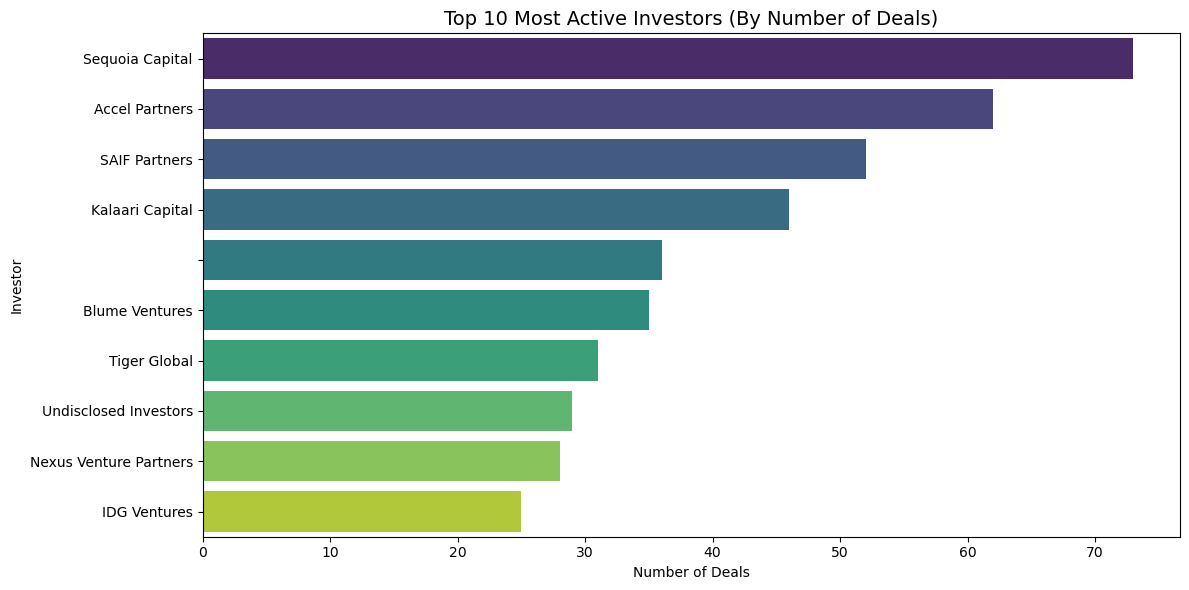

In [86]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_active_investors, x='Number of Deals', y='Investor', palette='viridis')
plt.title("Top 10 Most Active Investors (By Number of Deals)", fontsize=14)
plt.xlabel("Number of Deals")
plt.ylabel("Investor")
plt.tight_layout()
plt.show()





# Sequoia Capital stands out as the most active investor in the Indian startup ecosystem, with 73 deals,
# followed closely by Accel Partners and SAIF Partners.

# These investors focus on early to growth-stage funding, which explains the high volume of deals.

# The presence of Kalaari Capital, Blume Ventures, and Nexus Venture Partners shows that Indian VCs are also playing a big role alongside global players.

# Notably, Tiger Global appears in both the "Most Active" and "Biggest Investors" lists, indicating
# they are aggressive in both deal volume and deal size.

# The entries like “Undisclosed Investors” suggest that in several deals, investor names were not revealed, which may slightly affect the rankings.

#  Insight: While high-value investors dominate media headlines, it’s the most active investors 
# who often shape the ecosystem by nurturing startups from the ground up.

# next we can analysis  Biggest Investors (by Total Investment Amount)


# step1: Associate each investor with its deal amount


In [90]:
df_investors = df[['Investors', 'Amount in USD']].copy()
df_investors['Investors'] = df_investors['Investors'].str.split(',')
df_investors = df_investors.explode('Investors')
df_investors['Investors'] = df_investors['Investors'].str.strip()


# step2: Group by investor and sum investment amount


In [92]:
investor_amount = df_investors.groupby('Investors')['Amount in USD'].sum().reset_index()
investor_amount = investor_amount.sort_values(by='Amount in USD', ascending=False)


# step3 : Convert total investment to billions


In [94]:
investor_amount['Amount in USD (Billion)'] = investor_amount['Amount in USD'] / 1e9


# step4:Top 10 biggest investors



In [96]:

top_biggest_investors = investor_amount.sort_values(by='Amount in USD (Billion)', ascending=False).head(10)
top_biggest_investors

,Investors,Amount in USD,Amount in USD (Billion)
2350,Westbridge Capital,3.900000e+09,3.90000
1984,Softbank,3.545000e+09,3.54500
2147,Tiger Global,2.836900e+09,2.83690
1978,SoftBank Group,2.487000e+09,2.48700
1887,Sequoia Capital,1.717130e+09,1.71713
2131,Tencent Holdings,1.625000e+09,1.62500
512,DST Global,1.572000e+09,1.57200
2433,eBay,1.400000e+09,1.40000
1269,Microsoft,1.400000e+09,1.40000
655,Falcon Edge Capital,1.365500e+09,1.36550


# step 5 : ploting graph 



C:\Users\VARUN\AppData\Local\Temp\ipykernel_18908\1184134296.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_biggest_investors, x='Amount in USD (Billion)', y='Investors', palette='magma')


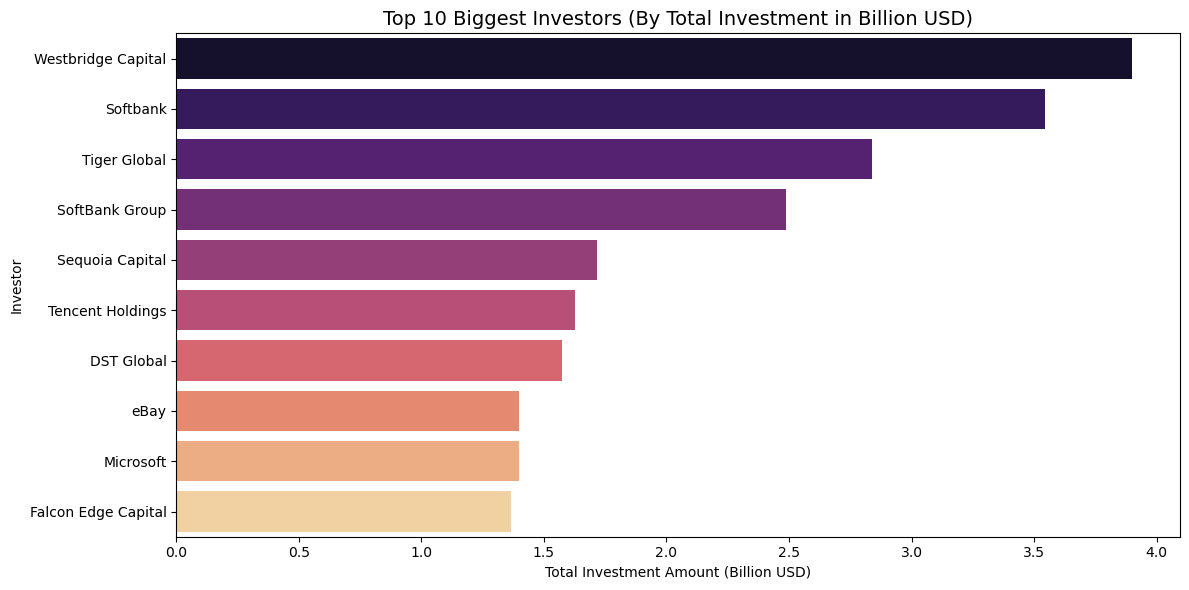

In [98]:
 
plt.figure(figsize=(12, 6))
sns.barplot(data=top_biggest_investors, x='Amount in USD (Billion)', y='Investors', palette='magma')
plt.title("Top 10 Biggest Investors (By Total Investment in Billion USD)", fontsize=14)
plt.xlabel("Total Investment Amount (Billion USD)")
plt.ylabel("Investor")
plt.tight_layout()
plt.show()

#  Conclusion: Top 10 Biggest Investors in the Indian Startup Ecosystem
# The analysis of the top 10 investors based on total investment amount reveals some key insights:

# Westbridge Capital emerged as the biggest investor, with a total funding of $3.9 billion USD, showing strong support across various startups.

# Softbank and Tiger Global follow closely, highlighting their aggressive investment strategies and consistent involvement in India's high-growth startups.

# Global tech giants like Microsoft, eBay, and Tencent Holdings also appear on the list, indicating rising foreign interest in the Indian startup landscape.

# Indian investment leaders like Sequoia Capital and Falcon Edge Capital continue to play a vital role in shaping the ecosystem.

#  Key Takeaway: The Indian startup ecosystem has attracted a mix of domestic and international investors, with a few heavyweights 
# contributing significantly to total funding. 
# This indicates strong global confidence in India’s innovation and growth potential.

# next we can do analysis on Funding Type Analysis 

# This tells you how startups are getting funded at different stages.

# first step: Count number of deals for each funding type

In [103]:
funding_type_count = df['Investment Type'].value_counts().reset_index()
funding_type_count.columns = ['Funding Type', 'Number of Deals']

# Display top funding types
print(funding_type_count.head(10))


           Funding Type  Number of Deals
0        Private Equity             1073
1          Seed Funding              721
2   Seed/ Angel Funding               45
3              Series A               40
4  Seed / Angel Funding               32
5              Series B               27
6              Series C               24
7          Debt Funding               22
8         Seed\nFunding               22
9                  Seed               21


#  Step 2: Total funding amount by funding types

In [105]:
funding_type_amount = df.groupby('Investment Type')['Amount in USD'].sum().reset_index()
funding_type_amount = funding_type_amount.sort_values(by='Amount in USD', ascending=False)

# step 3: Convert to billion dollars

In [107]:

funding_type_amount['Amount in USD (Billion)'] = funding_type_amount['Amount in USD'] / 1e9

In [108]:
# Display top 10
print(funding_type_amount.head(10))

         Investment Type  Amount in USD  Amount in USD (Billion)
33        Private Equity   2.666575e+10                26.665748
49              Series B   4.581396e+09                 4.581396
53              Series D   1.916799e+09                 1.916799
23                   M&A   1.200000e+09                 1.200000
56              Series F   1.100800e+09                 1.100800
20        Funding Round    1.000000e+09                 1.000000
51              Series C   9.827654e+08                 0.982765
42          Seed Funding   6.375883e+08                 0.637588
55              Series E   6.370000e+08                 0.637000
34  Private Equity Round   5.060000e+08                 0.506000


#  Step 4: Visualization – Bar Charts

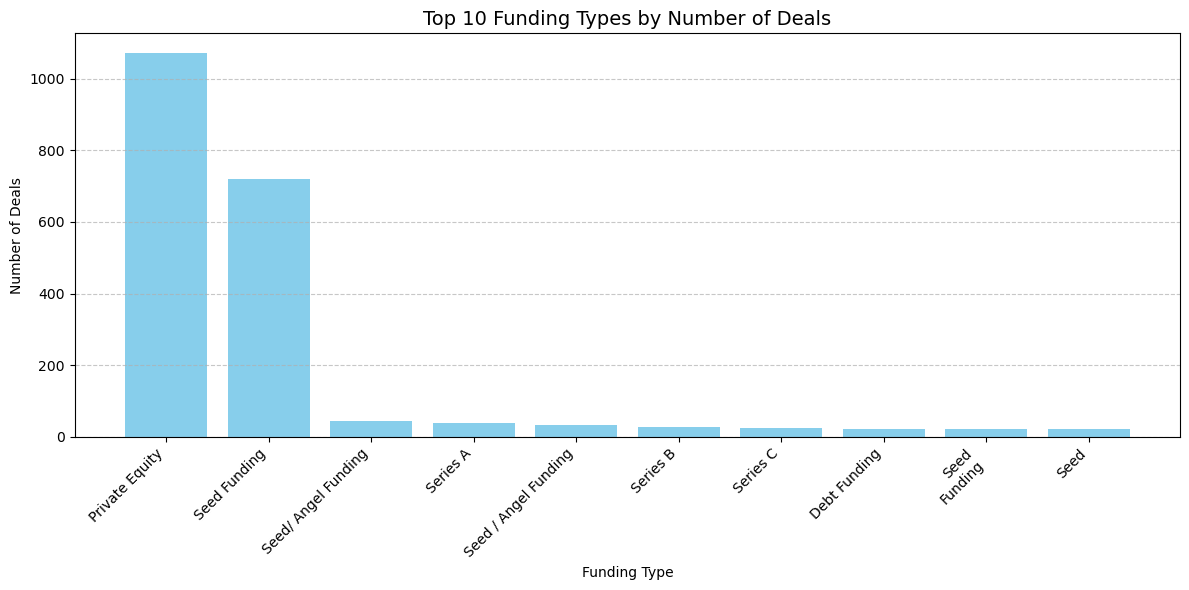

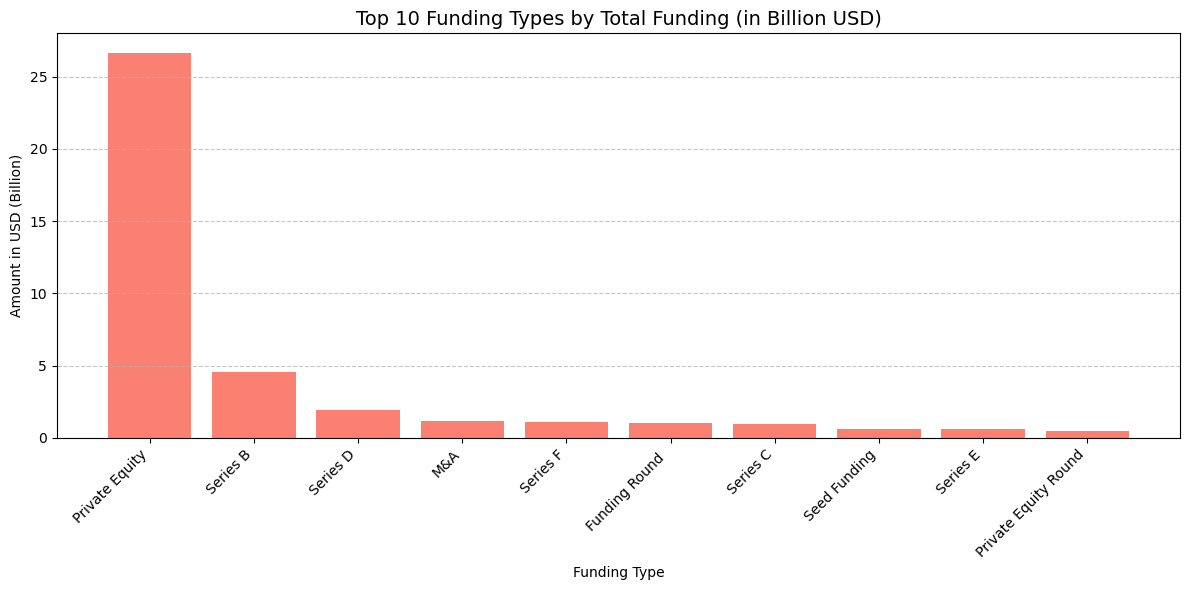

In [110]:
import matplotlib.pyplot as plt

# Sort and take top 10 funding types by number of deals
top10_deals = funding_type_count.sort_values(by='Number of Deals', ascending=False).head(10)

# Sort and take top 10 funding types by amount
top10_amount = funding_type_amount.sort_values(by='Amount in USD (Billion)', ascending=False).head(10)

# Plot 1: Top 10 by Number of Deals
plt.figure(figsize=(12, 6))
plt.bar(top10_deals['Funding Type'], top10_deals['Number of Deals'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Funding Types by Number of Deals', fontsize=14)
plt.xlabel('Funding Type')
plt.ylabel('Number of Deals')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot 2: Top 10 by Funding Amount (in Billion USD)
plt.figure(figsize=(12, 6))
plt.bar(top10_amount['Investment Type'], top10_amount['Amount in USD (Billion)'], color='salmon')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Funding Types by Total Funding (in Billion USD)', fontsize=14)
plt.xlabel('Funding Type')
plt.ylabel('Amount in USD (Billion)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#  Conclusion: Top 10 Funding Types by Investment Amount
# Private Equity leads by a massive margin with $26.67 Billion, clearly dominating late-stage funding. 
# This shows that many startups eventually attract large capital infusions once they mature and scale.

# Series B (4.97B dollars ) and Series D ($2.11B dollars) are the next big contributors, indicating strong investor interest in companies 
# that have shown consistent performance and need funds to expand further.

# Series C, D, E, and F rounds together cover multiple stages of growth, where companies already have products
# and customers and are now scaling aggressively.

# Seed Funding ($0.64B) appears lower in total amount but usually happens in smaller chunks across many startups,
# which still reflects early-stage ecosystem strength.

# M&A (Mergers & Acquisitions) and Funding Rounds show that companies are also raising capital or
# exiting through alternative ways, adding diversity to the investment landscape.



#  Key Insights:
# Private Equity = Most Money 💸, typically at late stages.

# Series B-F = Growth and Scaling 💼

# Seed = Many small deals 🌱, less in total amount.

# M&A/Funding Rounds = Strategic funding paths 🔁

# This distribution gives a strong indication that the Indian startup ecosystem is maturing, 
# with investors supporting startups across all phases — from idea to  Initial Public Offering (IPO), .

# next we can do City-wise Startup Funding Analysis 

In [114]:
df.columns

Index(['Date', 'Startup Name', 'Industry', 'Sub-vertical', 'Location',
       'Investors', 'Investment Type', 'Amount in USD', 'Website URL', 'Year',
       'Amount in USD (Billion)'],
      dtype='object')

# step 1:   Group by Location
     

In [116]:


location_grouped = df.groupby('Location').agg({
    'Amount in USD': ['count', 'sum']
}).reset_index()


# step 2:   Flatten the multi-index columns



In [118]:

location_grouped.columns = ['Location', 'Number of Startups', 'Total Funding (USD)']


# step 3  :  Convert funding to Billion USD


In [120]:

location_grouped['Total Funding (Billion USD)'] = location_grouped['Total Funding (USD)'] / 1e9


 # step 4: Sort the locations by 'Total Funding (Billion USD)' in descending order


In [122]:
top_locations = location_grouped.sort_values('Total Funding (Billion USD)', ascending=False).head(10)
top_locations

,Location,Number of Startups,Total Funding (USD),Total Funding (Billion USD)
9,Bengaluru,634,2.320506e+10,23.205062
46,Mumbai,415,4.531651e+09,4.531651
26,Gurugram,265,4.469565e+09,4.469565
20,Delhi,270,3.346020e+09,3.346020
58,Noida,57,1.286864e+09,1.286864
63,Pune,76,1.030606e+09,1.030606
18,Chennai,76,7.242670e+08,0.724267
29,Hyderabad,74,4.047762e+08,0.404776
43,Kormangala,2,2.840000e+08,0.284000
22,Faridabad,2,2.520000e+08,0.252000



#  step5:  Plotting the data


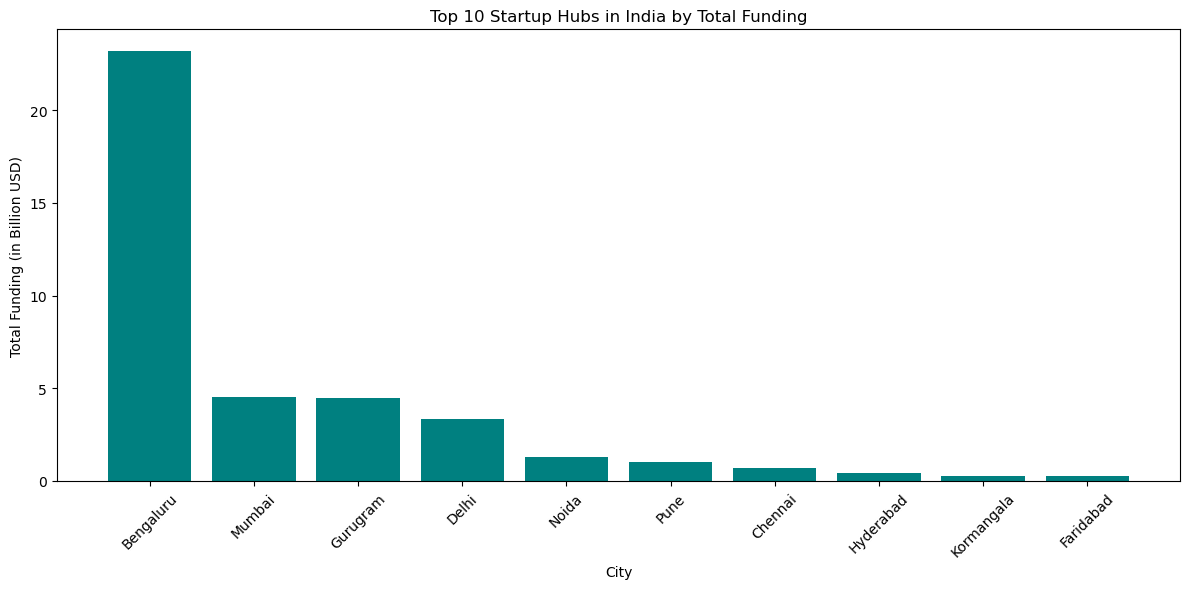

In [124]:
plt.figure(figsize=(12, 6))
plt.bar(top_locations['Location'], top_locations['Total Funding (Billion USD)'], color='teal')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Total Funding (in Billion USD)')
plt.title('Top 10 Startup Hubs in India by Total Funding')
plt.tight_layout()
plt.show()

#  AS  conclusion we can say that

# 1. Bengaluru is the Clear Leader:
# Bengaluru has by far the highest number of startups (634) and total funding (23.21 billion dollars).

# It accounts for a massive portion of the total startup funding in India, indicating it is the leading startup hub in the country.
# This is not surprising as Bengaluru is often called the "Silicon Valley of India" due to its thriving tech ecosystem.

# 2. Mumbai Follows as a Major Hub:
# Mumbai ranks second with 415 startups and $4.53 billion in funding.

# While significantly lower than Bengaluru, Mumbai still has a strong presence, possibly driven by its status as 
# India’s financial and commercial capital.

# 3. Gurugram and Delhi are Key Growth Hubs:
# Gurugram (265 startups, 4.47 billion dollars in funding) and Delhi (270 startups, $3.35 billion in funding) follow in terms of total funding.

# These cities are seeing consistent growth and could be considered major hubs for startups, particularly in sectors like e-commerce, fintech, and SaaS.

# 4. Smaller Cities and Localities Show Potential:
# Noida (57 startups, 1.29 billion dollars) and Pune (76 startups, 1.03 billion dollars) show significant investment despite having fewer startups than the top cities.

# These cities are emerging as important centers, particularly for tech startups and specialized industries.


In [126]:

# 5. Chennai, Hyderabad, Kormangala, and Faridabad are Smaller but Significant:
# Chennai (76 startups, 724 million dollars) and Hyderabad (74 startups, $405 million) are still growing, 
# with good potential in specific sectors like healthtech, edtech, and SaaS.

# Kormangala and Faridabad, while smaller (with only 2 startups each), still attract funding, which could indicate niche 
# startup activity or early-stage companies receiving investments in these regions.

# 6. Concentration of Funding:
# A large proportion of India's total funding is concentrated in Bengaluru, highlighting the city's dominance in the startup ecosystem.

# Most of the other cities, while having significant numbers of startups, contribute much smaller funding amounts. 
# This suggests that while the startup ecosystem is widespread across India, the lion's share of capital is focused on the most mature and 
# scalable ventures, particularly in Bengaluru.



# 7. Diversity in Funding Across Locations:
# There is a diverse distribution of startup hubs across India, showing that innovation and 
# entrepreneurship are not just limited to major metros like Bengaluru and Mumbai.

# Smaller cities are still receiving funding, indicating a growing interest in tier-2 and tier-3 cities for investment opportunities.

# Conclusion:
# Bengaluru remains the dominant player in India's startup ecosystem, followed by Mumbai and Gurugram.

# Smaller cities like Noida, Pune, Chennai, and Hyderabad are emerging as key players with growing startup scenes.

# The funding distribution shows that while there are several smaller hubs, the overall trend is that large funding amounts are 
# concentrated in mature, growth-stage startups in bigger cities, especially Bengaluru.





# next we can anlysis  top funded starups  along with their funding type

#  Step 1: Create a combined label of 'Startup Name' + 'Investment Type'

In [130]:

df['Label'] = df['Startup Name'] + ' (' + df['Investment Type'] + ')'

# Step 2: Convert funding amount from USD to Billion USD for easier visualization


In [132]:
df['Amount in Billion USD'] = df['Amount in USD'] / 1e9


# Step 3: Group the data by the new 'Label' and sum the total funding for each startup + investment type


In [134]:
label_grouped = df.groupby('Label').agg({
    'Amount in Billion USD': 'sum'
}).reset_index()



# Step 4: Sort the grouped data to get the Top 10 funded startup + investment type combinations


In [136]:
top_funded_combos = label_grouped.sort_values(by='Amount in Billion USD', ascending=False).head(10)

# Step 5: ploting graph



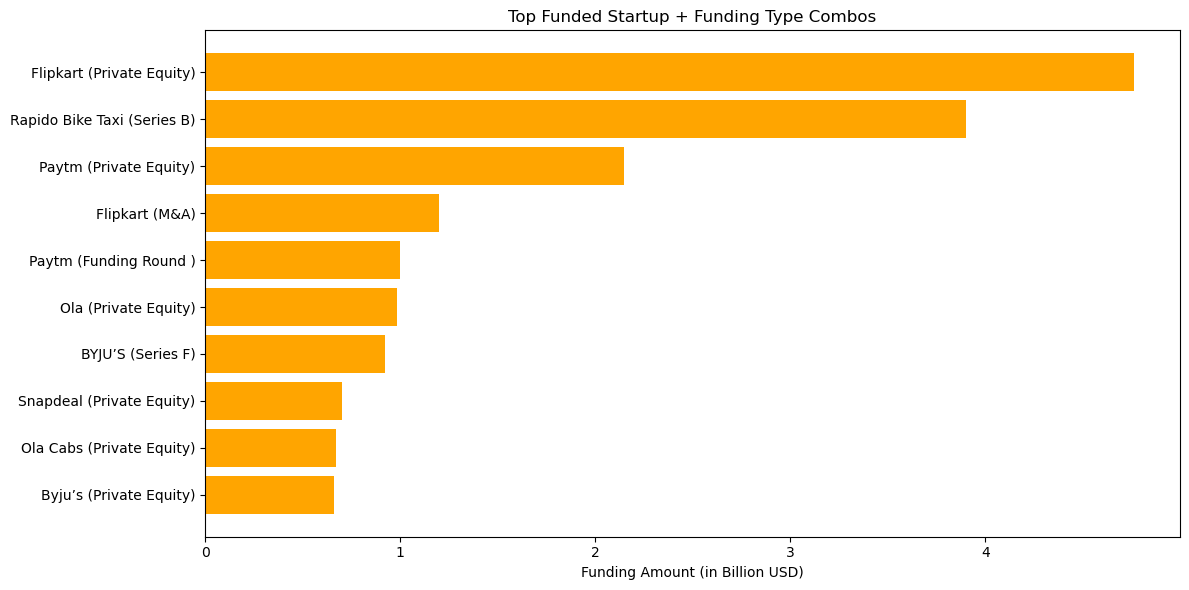

In [138]:
import matplotlib.pyplot as plt
# Set figure size for the plot
plt.figure(figsize=(12, 6))

# Create a horizontal bar plot to show top funded startup + funding type combos
plt.barh(top_funded_combos['Label'], top_funded_combos['Amount in Billion USD'], color='orange')

# Label the X-axis
plt.xlabel('Funding Amount (in Billion USD)')

#  Set a title for the chart
plt.title('Top Funded Startup + Funding Type Combos')

#  Invert the Y-axis so that the highest funded startup appears at the top
plt.gca().invert_yaxis()

#  Adjust layout to prevent label cutting
plt.tight_layout()

#  Display the plot
plt.show()


#  Top Insights from the graph :

# Flipkart dominates with the highest single funding — $4.75 Billion (Private Equity).
#  Shows strong late-stage investor confidence in Flipkart.

# Rapido Bike Taxi surprisingly raised $3.9 Billion in Series B!
#  Means a huge early scaling bet by investors — rare for Series B.

# Paytm appears twice — Private Equity (2.14B dollars) and Funding Round (1B dollars).
# Shows Paytm consistently attracts large rounds from different funding types.

# Ola and BYJU'S also raised close to $1 Billion each.
# Both companies have matured into major players needing massive scaling funds.

# Snapdeal and Ola Cabs also show strong Private Equity funding
#  Indicates the e-commerce and ride-hailing sectors had strong investor interest.
# Overall, Private Equity and late-stage funding dominate the biggest amounts.
#  Most of these companies were already market leaders at the time of these fundings.



# Final Conclusion:
# "The largest investments were concentrated in a few top startups like Flipkart, Paytm, Ola, BYJU’S, and Snapdeal. 
# Private Equity rounds dominate the top funding events, highlighting strong late-stage investor interest in market leaders. 
# Surprisingly, Rapido's Series B round also raised a massive amount, indicating rare early-stage investor confidence at scale."



 # next we can do anlysis on  top  funding round trends  over time

# step 1 :  Ensure 'Year' column exists


In [143]:
df['Year'] = pd.to_datetime(df['Date']).dt.year

#  step 2: Group by Year and Investment Type, and calculate the total funding amount


In [145]:
funding_round_trends = df.groupby(['Year', 'Investment Type'])['Amount in USD'].sum().reset_index()

#  step 3 : Calculate the total funding per investment type across all years

In [147]:

total_funding_per_type = funding_round_trends.groupby('Investment Type')['Amount in USD'].sum()


# step 4 :  Get the top 10 investment types based on total funding


In [149]:
top_10_investment_types = total_funding_per_type.nlargest(10).index





#  step 5 : Calculate the total funding per investment type across all years

In [151]:



total_funding_per_type = funding_round_trends.groupby('Investment Type')['Amount in USD'].sum()

#  step 6 : Get the top 10 investment types based on total funding


In [153]:
top_10_investment_types = total_funding_per_type.nlargest(10).index

# step 7 : Filter the funding_round_trends to include only the top 10 investment types

In [155]:

funding_round_trends_top_10 = funding_round_trends[funding_round_trends['Investment Type'].isin(top_10_investment_types)]


# step 8 : Convert to pivot table

In [157]:

pivot_funding_round = funding_round_trends_top_10.pivot(index='Year', columns='Investment Type', values='Amount in USD').fillna(0)


#  step 9 : Convert to Billion USD



In [159]:
pivot_funding_round = pivot_funding_round / 1e9





# step 10 : Ploting the graph





C:\Users\VARUN\AppData\Local\Temp\ipykernel_18908\1367310266.py:6: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  plt.tight_layout()
C:\Users\VARUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


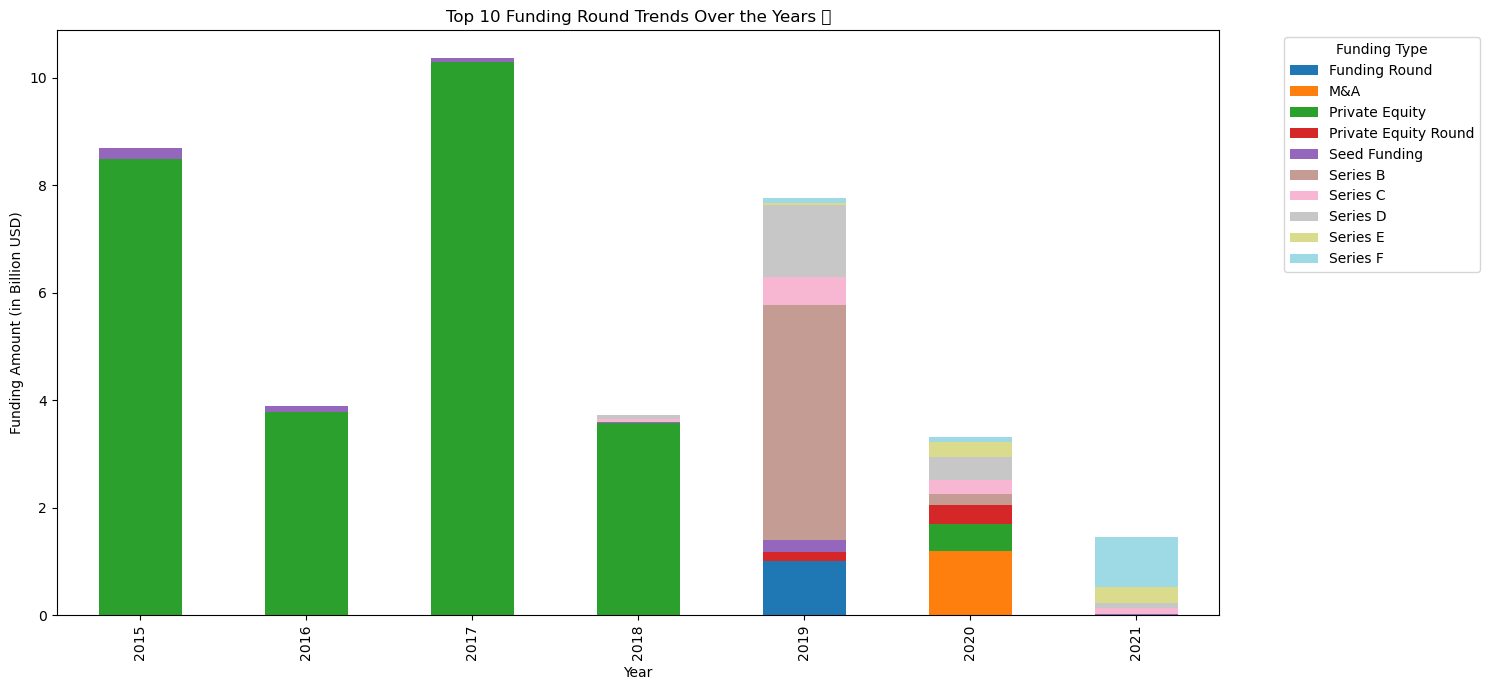

In [161]:
pivot_funding_round.plot(kind='bar', stacked=True, figsize=(15,7), colormap='tab20')
plt.title('Top 10 Funding Round Trends Over the Years 📅')
plt.xlabel('Year')
plt.ylabel('Funding Amount (in Billion USD)')
plt.legend(title='Funding Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Major Conclusions:
# Private Equity was the main source of funding early on (2015–2017):

# From 2015 to 2017, almost all the funding came through Private Equity — very high amounts like 8.49B in 2015, 10.29B in 2017.

# Other types like Seed Funding, Series rounds were almost zero.

# Starting 2018, more diversity in funding types appeared:

# Series C, D, E rounds started appearing from 2018.

# Seed Funding and Series B became more noticeable after 2018.

# Funding sources started spreading out — not just Private Equity anymore.



# Big activity spike in 2019:

# Series B funding jumped massively (4.37B USD), which is the highest Series B amount compared to any other year.

# Series D and Seed Funding also saw good activity in 2019.

# Funding Round (general funding) appeared for the first time in 2019 (1B).

# 2020 saw strong M&A (Mergers & Acquisitions):?

# M&A activity (1.2B USD) appeared only in 2020.

# Private Equity was still strong but lower (0.5B).

# Series C, D, E, and F funding rounds were alive too — multiple stages were funded in 2020.



# 2021 funding shifted toward later-stage rounds:

# Series F (0.92B) and Series E (0.308B) had higher funding compared to other rounds.

# Early-stage funding (Seed Funding, Series B) became very small.

# This suggests companies were moving toward later growth or exit stages.

# 🔥 High-Level Insights:
# Private Equity was king from 2015–2017.

# 2019 was a breakout year for Series B and diversified funding.

# 2020 was notable for M&A deals and steady late-stage funding.

# 2021 funding was dominated by later-stage rounds (Series E, F) — indicating startups were maturing and raising larger late-stage rounds.

# Seed funding and early rounds shrank in 2021, hinting at either market saturation or focus on scaling existing startups rather than funding new ones.



In [165]:






#  Conclusion
# In this project, we performed an end-to-end Exploratory Data Analysis (EDA) on the Indian startup funding dataset. We uncovered key insights about:

# 🔝 Top funded startups overall and within each year

# 💰 Most popular funding types and their corresponding amounts

# 🏙️ City-wise startup ecosystem, identifying key startup hubs

# 🏭 Top industries attracting the most investment

# 📈 Trends in funding over the years

# 👥 Top investors by the number of deals and total capital deployed

# We also ensured data cleaning, such as:

# Merging inconsistent location and industry names

# Handling missing or incorrect values

# Filtering out irrelevant entries for accurate insights

# This project helped sharpen my skills in data preprocessing, visualization, and storytelling using Python libraries
# like Pandas, Matplotlib, and Seaborn.

# 📦 Dataset Source


